# Steps of clustering research

In [1]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

x.shape

(150, 4)

# DBSCAN

## DBSCAN - scaling

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
pca_scaler = PCA(n_components=4)

standard_scaler.fit(x)
minmax_scaler.fit(x)
pca_scaler.fit(x)

standard_x = standard_scaler.transform(x)
minmax_x = minmax_scaler.transform(x)
pca_x = pca_scaler.transform(x)

## DBSCAN - choose the number of cluster - PCA

In [71]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=2*x.shape[1]).fit(standard_x)# 0.010990990990990991 #eps=0.5, min_samples=2*x.shape[1]
y_pred = dbscan.labels_


cluster_center = dbscan.components_
cluster_center.shape
x.shape

(150, 2)

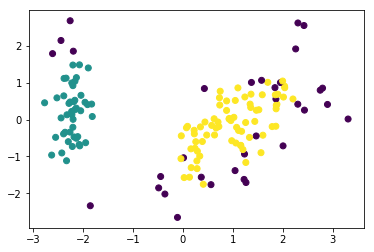

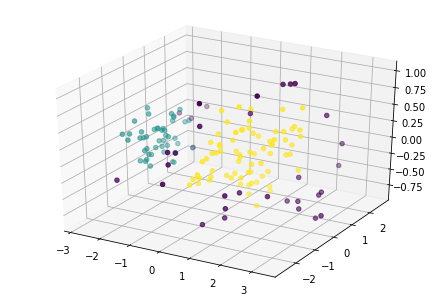

In [72]:
#check result using PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=2)
pca.fit(standard_x)  
x_pca = pca.transform(standard_x)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)


#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,alpha=1)
plt.show()

pca = PCA(n_components=3)
pca.fit(standard_x)  
x_pca = pca.transform(standard_x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred)
plt.show()

## DBSCAN - silhouette_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [84]:
from sklearn.metrics import silhouette_samples

dbscan = DBSCAN(eps=0.5, min_samples=2*x.shape[1]).fit(standard_x)#
y_pred = dbscan.labels_

dbscan_silhouette_samples = silhouette_samples(x,y_pred)
dbscan_silhouette_samples

array([-0.10367832,  0.02962516, -0.11671281, -0.10237036, -0.08224465,
       -0.11569131, -0.09565726,  0.03508183,  0.04427888, -0.0494558 ,
        0.02948782,  0.04440487, -0.09448359,  0.05063759, -0.05971396,
       -0.07698246, -0.11613234, -0.09693178,  0.04713951,  0.02850555,
       -0.11279064, -0.0861038 , -0.11328226, -0.06908445, -0.03459169,
        0.04468448, -0.11437816,  0.02894789, -0.06871078, -0.06852049,
        0.02804186, -0.10223341, -0.07610177, -0.07796484, -0.05927751,
        0.02626192, -0.0995322 ,  0.0291894 ,  0.03979036, -0.06032927,
       -0.10214813, -0.08149207,  0.02368615,  0.04185206, -0.0638898 ,
        0.01986065,  0.03253531, -0.10087023, -0.09813361, -0.10115649,
        0.01113091, -0.12712818,  0.01927327,  0.0355712 ,  0.03115926,
        0.01916102,  0.01378023, -0.0589814 ,  0.04135683, -0.02436038,
       -0.06321005, -0.11938442, -0.00927355,  0.03505572,  0.03645778,
        0.02793615,  0.03648027, -0.02040394, -0.06441086,  0.03

In [115]:
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=2*x.shape[1]).fit(standard_x)#standard_x , standard_x[:,[2,3]]
y_pred = dbscan.labels_

dbscan_silhouette_score = silhouette_score(x,y_pred)
dbscan_silhouette_score

-0.0340976052194211

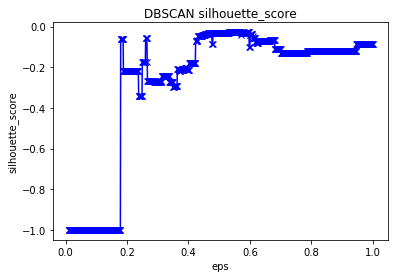

In [74]:


silhouette_score_list = []
eps_range = np.linspace(0.01,1,1000)

for eps_val in eps_range:
    dbscan = DBSCAN(eps=eps_val, min_samples=2*x.shape[1]).fit(standard_x)
    y_pred = dbscan.labels_
    
    if len(np.unique(y_pred)) > 1:
        dbscan_silhouette_score = silhouette_score(x,y_pred)
        silhouette_score_list.append(dbscan_silhouette_score)
    else:
        silhouette_score_list.append(-1)
    


plt.plot(eps_range, silhouette_score_list, 'bx-')
plt.xlabel('eps')
plt.ylabel('silhouette_score')
plt.title('DBSCAN silhouette_score')
plt.show()




## DBSCAN - silhouette_score - hyperparameter

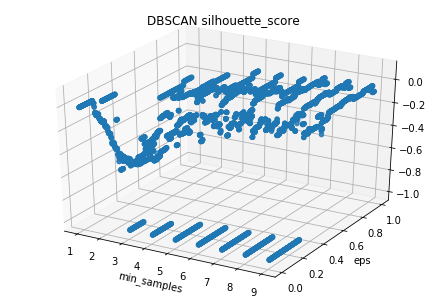

In [51]:
from mpl_toolkits.mplot3d import Axes3D

silhouette_score_list = []
eps_range = np.linspace(0.01,1,1000)
min_samples_range = range(1,5*x.shape[1],1)

eps_list = list()
min_samples_list = list()

for eps_val in eps_range:
    for min_samples_val in min_samples_range:
    
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val).fit(standard_x)
        y_pred = dbscan.labels_

        if len(np.unique(y_pred)) > 1:
            dbscan_silhouette_score = silhouette_score(x,y_pred)
            silhouette_score_list.append(dbscan_silhouette_score)
        else:
            silhouette_score_list.append(-1)
        eps_list.append(eps_val)
        min_samples_list.append(min_samples_val)
    

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(min_samples_list,eps_list, silhouette_score_list)#,c=y_pred
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('DBSCAN silhouette_score')
plt.show()



In [58]:
silhouette_score_np = np.array(silhouette_score_list)
silhouette_score_np.argmax()
silhouette_score_list[1]

0.07729561319242116

In [59]:
eps_range[1]

0.010990990990990991

In [60]:
min_samples_range[1]

2

## DBSCAN - make cluster

## DBSCAN - Feature Importance - Feature Selection

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=2*x.shape[1]).fit(standard_x)#
y_pred = dbscan.labels_

0
1
2
3


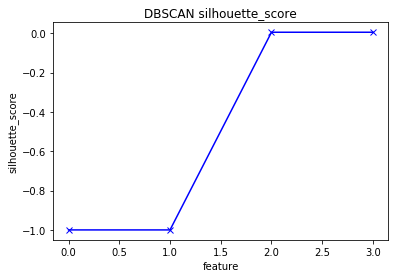

In [112]:
silhouette_score_list = []
feature_range = range(0,standard_x.shape[1])

for i in feature_range:
    current_x = standard_x[:,i].reshape(-1, 1)
    
    dbscan = DBSCAN(eps=0.5, min_samples=2).fit(current_x)# min_samples=2*x.shape[1]
    y_pred = dbscan.labels_
    
    if len(np.unique(y_pred)) > 1:
        dbscan_silhouette_score = silhouette_score(x,y_pred)
        silhouette_score_list.append(dbscan_silhouette_score)
    else:
        silhouette_score_list.append(-1)
    print(i)
    


plt.plot(feature_range, silhouette_score_list, 'bx-')
plt.xlabel('feature')
plt.ylabel('silhouette_score')
plt.title('DBSCAN silhouette_score')
plt.show()

In [110]:
standard_x.shape[1]

4